In [75]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from scipy.stats import randint

# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



import warnings
import scipy.io
print("TensorFlow version: ", tf.__version__)

warnings.filterwarnings('ignore')

TensorFlow version:  2.2.0


#  Load Data 

In [76]:
# import data 
tweets_train= pd.read_table('C:/Users/rzouga/Downloads/Github/NLP/train_tweets.txt', '\t',header=None)
tweets_train = tweets_train[0].str.split(",", n = 1, expand = True) 
tweets_train.columns = ["sentiment", "tweets"]
tweets_test =pd.read_table('C:/Users/rzouga/Downloads/Github/NLP/test_tweets.txt', '\t',header=None)
tweets_test = tweets_test[0].str.split(",", n = 1, expand = True) 
tweets_test.columns = ["sentiment", "tweets"]
# Print the head of df
tweets_train.head(3)

,sentiment,tweets
0,positive,Gas by my house hit $3.39!!!! I'm going to Ch...
1,negative,"Theo Walcott is still shit, watch Rafa and Jo..."
2,negative,"its not that I'm a GSP fan, i just hate Nick ..."


In [77]:
tweets_test.head(3)

,sentiment,tweets
0,neutral,"Won the match #getin . Plus, tomorrow is a ve..."
1,neutral,Did y'all hear what Tony Romo dressed up as f...
2,positive,Lunch from my new Lil spot ...THE COTTON BOWL...


# Understanding Target variable

In [78]:
tweets_train.sentiment.unique() 

array(['positive', 'negative', 'neutral'], dtype=object)

In [79]:
# Find the number of positive and negative reviews
print('Number of positive, neutral and negative reviews: ',tweets_train.sentiment.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive,neutral and negative reviews: ', tweets_train.sentiment.value_counts()/ len(tweets_train))

Number of positive, neutral and negative reviews:  neutral     3236
positive    2413
negative     939
Name: sentiment, dtype: int64
Proportion of positive,neutral and negative reviews:  neutral     0.491196
positive    0.366272
negative    0.142532
Name: sentiment, dtype: float64


In [80]:
tweets_train.dropna()
tweets_train.drop_duplicates()
tweets_test.dropna()
tweets_test.drop_duplicates()

,sentiment,tweets
0,neutral,"Won the match #getin . Plus, tomorrow is a ve..."
1,neutral,Did y'all hear what Tony Romo dressed up as f...
2,positive,Lunch from my new Lil spot ...THE COTTON BOWL...
3,positive,SNC Halloween Pr. Pumped. Let's work it for S...
4,neutral,Manchester United will try to return to winni...
...,...,...
1039,neutral,#WEB YouTube improves upload process with opt...
1040,positive,Gonna change my Tumblr theme. I hope I can fi...
1041,neutral,I'm so jealous of everyone at the Justin Bieb...
1042,neutral,"Jim Harbaugh, Alex Smith Drive Giants World S..."


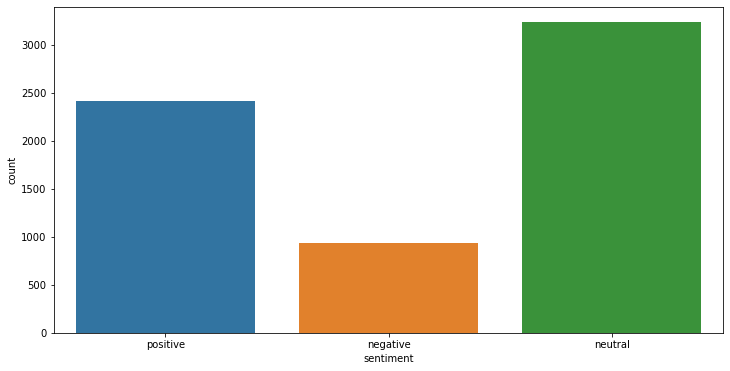

In [81]:
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=tweets_train)

In [82]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
# Spacy preporcessing 
#Stop words
#importing stop words from English language.
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re 

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer_cleaner(sentence):
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, '', sentence)
    # Normalize text
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", sentence.lower())
    # Remove urls
    sentence = re.sub(r"http\S+|www\S+|https\S+", '', sentence, flags=re.MULTILINE)
    # Remove user @ references 
    sentence = re.sub(r'\@\w+','', sentence)
    # remove old style retweet text "RT"
    sentence= re.sub(r'^RT[\s]+', '', sentence)

    # remove hyperlinks
    sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)

    # remove hashtags
    # only removing the hash # sign from the word
    sentence= re.sub(r'#', '',sentence)
    # Creating our token object, which is used to create documents with linguistic annotations.
    
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return ' '.join(mytokens)


# Clean our tweetes 

In [83]:
tweets_train['tweets_cleaned'] = tweets_train.tweets.apply(spacy_tokenizer_cleaner)
tweets_test['tweets_cleaned'] = tweets_test.tweets.apply(spacy_tokenizer_cleaner)


# feature extraction

In [84]:
# using spacy 
# Word tokenization
from spacy.lang.en import English
from sklearn.preprocessing import OneHotEncoder
tweets_train['n_char']=tweets_train.tweets.apply(lambda x:len(x))

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
# Tokenize each item in the review column
# Create a new feature for the lengh of each review
tweets_train['n_words'] =tweets_train.tweets.apply(lambda x: len(nlp(x)))
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

tweets_train['punct%'] = tweets_train['tweets'].apply(lambda x: count_punct(x))

tweets_train.head(3)

,sentiment,tweets,tweets_cleaned,n_char,n_words,punct%
0,positive,Gas by my house hit $3.39!!!! I'm going to Ch...,gas house hit 3 39 m going chapel hill sat,66,22,19.2
1,negative,"Theo Walcott is still shit, watch Rafa and Jo...",theo walcott shit watch rafa johnny deal saturday,77,17,3.2
2,negative,"its not that I'm a GSP fan, i just hate Nick ...",m gsp fan hate nick diaz t wait february,76,22,8.3


# Machine Learning-Based Approaches
# train_test_split

In [85]:
from sklearn.preprocessing import OneHotEncoder
X_train= tweets_train['tweets_cleaned']# the features we want to analyze
X_test=tweets_test['tweets_cleaned']
y_train=tweets_train['sentiment']
y_test =tweets_test['sentiment']

#### Create the encoder.
encoder = LabelEncoder()

encoder.fit(y_train)   # Assume for simplicity all features are categorical.

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

print("y_train",y_train.shape)
print("y_test",y_test.shape)


y_train (6588,)
y_test (1044,)


# Naive Bayes classifier
# Bag-of-words

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,ENGLISH_STOP_WORDS
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
# tokenizer = spacy_tokenizer
vectorizer = CountVectorizer(min_df=2, max_df=1500).fit(X_train)
X_train_cv =vectorizer.transform(X_train)
X_test_cv =vectorizer.transform(X_test)

def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')
#X_train_cv = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_cv = add_feature(X_test_cv, [len_test, dig_test, nan_test])

NB=MultinomialNB(alpha=0.1)
NB.fit(X_train_cv, y_train)
predicted1=NB.predict(X_test_cv)
report = classification_report(y_test, predicted1)
print(X_train_cv.shape)
print(report)

(6588, 6364)
              precision    recall  f1-score   support

           0       0.50      0.33      0.39       193
           1       0.61      0.66      0.63       466
           2       0.59      0.63      0.61       385

    accuracy                           0.59      1044
   macro avg       0.56      0.54      0.54      1044
weighted avg       0.58      0.59      0.58      1044



In [110]:
# Model Accuracy
print(" Accuracy1:",metrics.accuracy_score(y_test, predicted1))

 Accuracy1: 0.5862068965517241


In [119]:
y_train[0:2]

array([2, 0])

# TF-IDF

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, max_features=500).fit(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
#X_train_tf = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_tf = add_feature(X_test_cv, [len_test, dig_test, nan_test])
NB=MultinomialNB(alpha=0.1)
NB.fit(X_train_tf, y_train)
predicted2=NB.predict(X_test_tf)
report = classification_report(y_test, predicted2)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.14      0.23       193
           1       0.59      0.82      0.69       466
           2       0.62      0.57      0.59       385

    accuracy                           0.60      1044
   macro avg       0.62      0.51      0.50      1044
weighted avg       0.61      0.60      0.57      1044



In [118]:
# Model Accuracy
print(" Accuracy2:",metrics.accuracy_score(y_test, predicted2))

 Accuracy2: 0.6024904214559387


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, max_features=500).fit(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
#X_train_tf = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_tf = add_feature(X_test_cv, [len_test, dig_test, nan_test])
SVC=SVC()
SVC.fit(X_train_tf, y_train)
predicted3=SVC.predict(X_test_tf)
report = classification_report(y_test, predicted3)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.15      0.23       193
           1       0.58      0.88      0.70       466
           2       0.70      0.53      0.60       385

    accuracy                           0.62      1044
   macro avg       0.63      0.52      0.51      1044
weighted avg       0.63      0.62      0.58      1044



In [123]:
# Model Accuracy
print(" Accuracy3:",metrics.accuracy_score(y_test, predicted3))

 Accuracy3: 0.6168582375478927


# GridSearchCV+Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
# Setup the pipeline
tfidf_vector = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ).fit(X_train)
classifier = SVC()
steps = [('vectorizer', tfidf_vector),
         ('SVM', classifier)]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}


# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

# Deep Learning-Based Approaches

In [ ]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Flatten
from numpy import array
import tensorflow as tf

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
# Import relevant classes/functions
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Transform the list of sentences into a list of words
all_words = ' '.join(movies['review_cleaned']).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
vocab_size = len(set(all_words))
print(vocab_size)

# Preporcess

In [ ]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import  to_categorical
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
vocab_length = len(word_tokenizer.word_index) + 1
# Prepare the data
embedded_prep_data = word_tokenizer.texts_to_sequences(X_train)
#padded sentences 
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(X_train, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_prep_data= pad_sequences(embedded_prep_data, length_long_sentence, padding='post')
# Prepare the labels
encoder = LabelEncoder()
encoder.fit(y_train)

prep_labels = encoder.transform(y_train)


#prep_labels = tf.keras.utils.to_categorical(movies.sentiment)
print(padded_prep_data[0],prep_labels[0])
# Print the shapes
print(str(vocab_length))
print(str(length_long_sentence))
print(padded_prep_data.shape)
print(prep_labels.shape)

In [ ]:
# custumise our embeded  matrix or import GLOVE that accelearate the training process 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/rzouga/Desktop/cv-fr-en/CV+diplome/jobopr/glove.6B/glove.6B.50d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 # embeddings_dictionary now contains words and corresponding GloVe embeddings for all the words.   

glove_file.close()

In [ ]:
#train and test the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_prep_data,prep_labels, test_size=0.10)


In [ ]:
embedding_matrix = zeros((vocab_length, 50))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedding_matrix now contains pretrained word embeddings for the words in our corpus.

In [ ]:
#hybrid CNN-LSTM:
#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
wordvec_dim=50
model = tf.keras.Sequential()
model.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))

model.add(layers.Conv1D(100, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(16))
model.add(Dropout(rate=0.25))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=0, validation_split=0.1)

In [ ]:
loss, accuracy = model.evaluate( X_test, y_test, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)
print('Accuracy: %f' % (accuracy*100))
print('loss: %f' % (loss*100))